# Sistemas Multiagentes
## Universidade de Brasília - UnB FGA
### Aluno: Paulo Henrique Costa Gontijo
### Matrícula 15/0143800

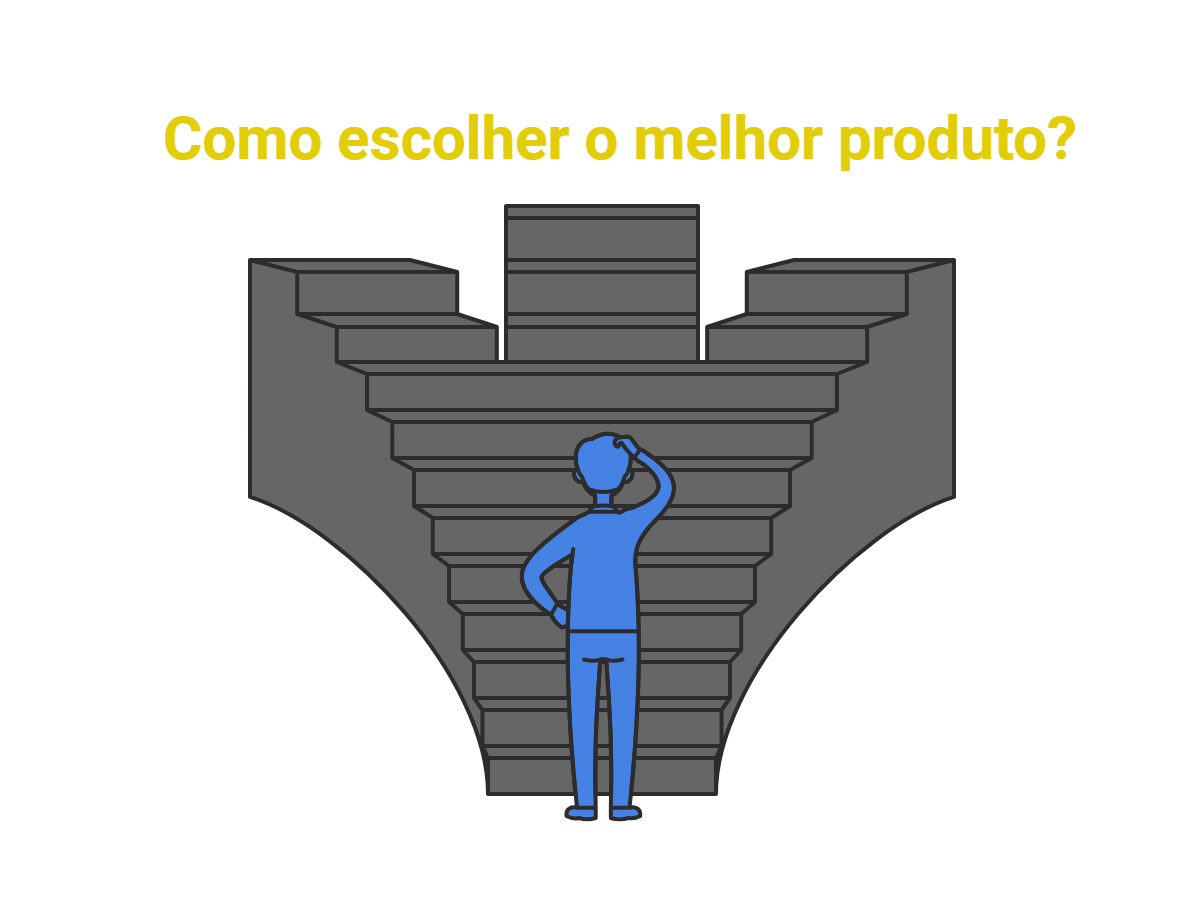

## Conceito
Este projeto desenvolve um Sistema Multiagentes (SMA) utilizando a biblioteca CrewAI, com o objetivo de auxiliar usuários na escolha de produtos para compra. O sistema integra quatro agentes especializados que colaboram para buscar informações sobre produtos na internet, analisar suas características e recomendar a melhor opção ao usuário com base em critérios objetivos.
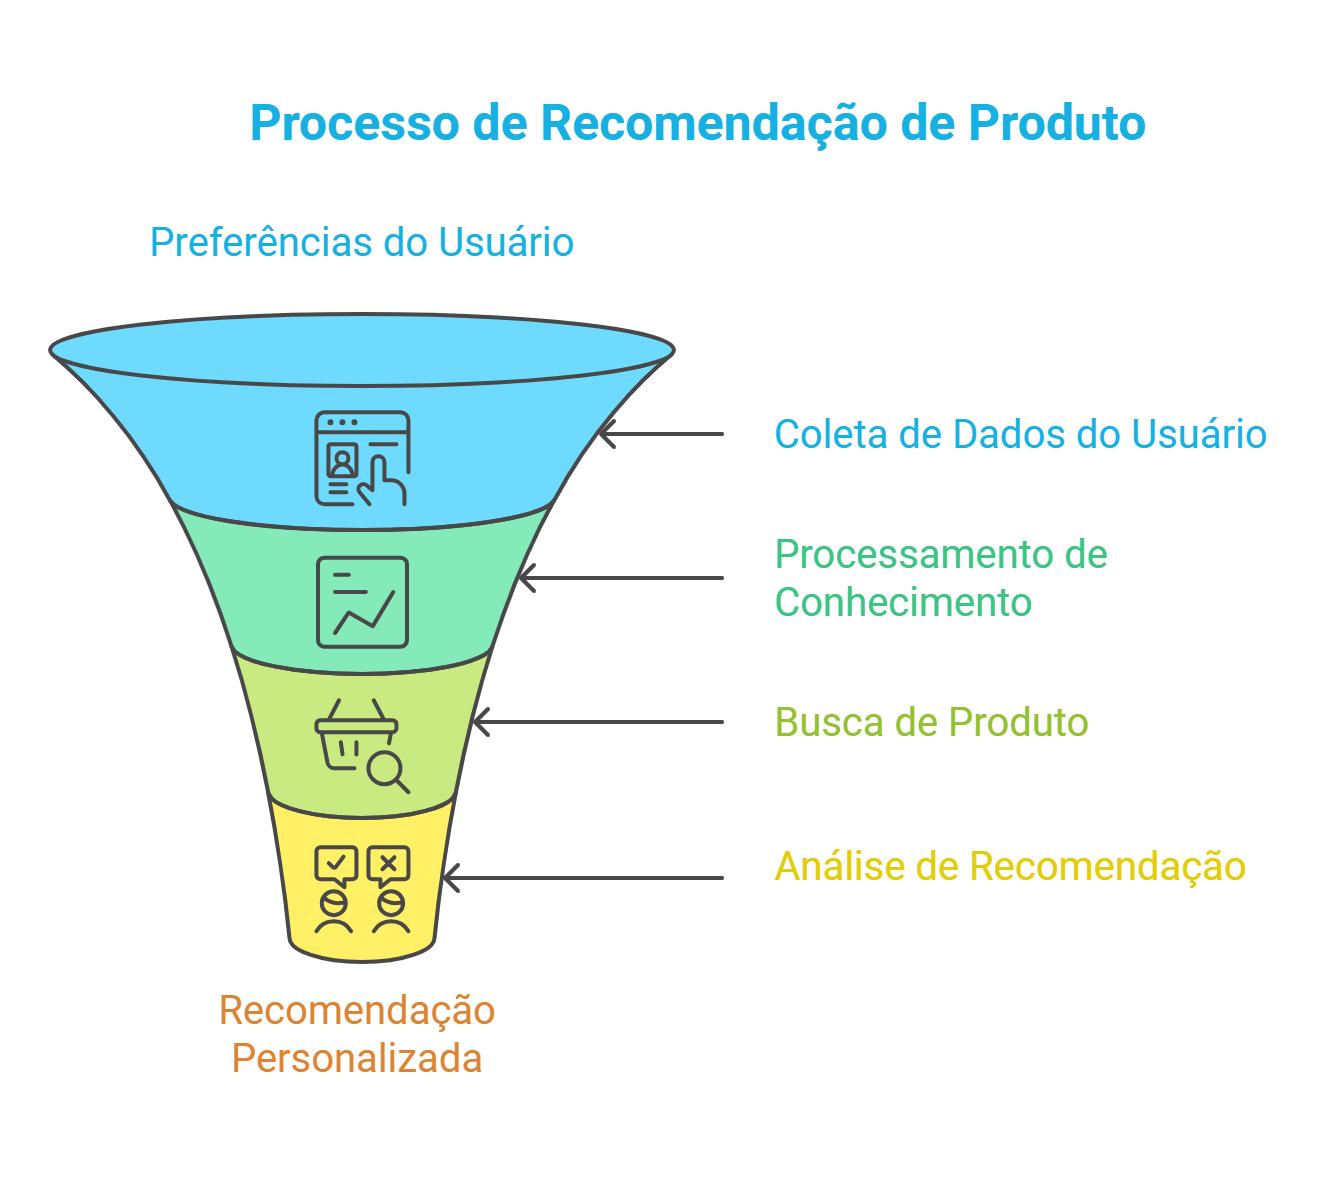

## Funcionamento do Sistema:
### Agente de Comunicação com o Usuário
Responsável pela interface inicial com o usuário.
Faz perguntas para entender qual produto o usuário deseja adquirir e coleta detalhes relevantes (ex.: tipo, faixa de preço, preferências).

### Agente de Conhecimento
Processa as informações recebidas pelo Agente de Comunicação.
Gera textos informativos sobre características principais do produto, fatores de atenção na compra e uma análise de pontos positivos e negativos dos produtos encontrados.

### Agente Buscador
Realiza buscas automatizadas na internet, utilizando as informações fornecidas pelo Agente de Comunicação e critérios definidos pelo Agente de Conhecimento.
Coleta dados de sites confiáveis que vendem produtos similares aos descritos.

### Agente de Recomendação
Analisa as informações sobre os produtos coletados pelo Agente Buscador.
Gera recomendações personalizadas, priorizando a relação entre pontos positivos e negativos e as preferências do usuário.
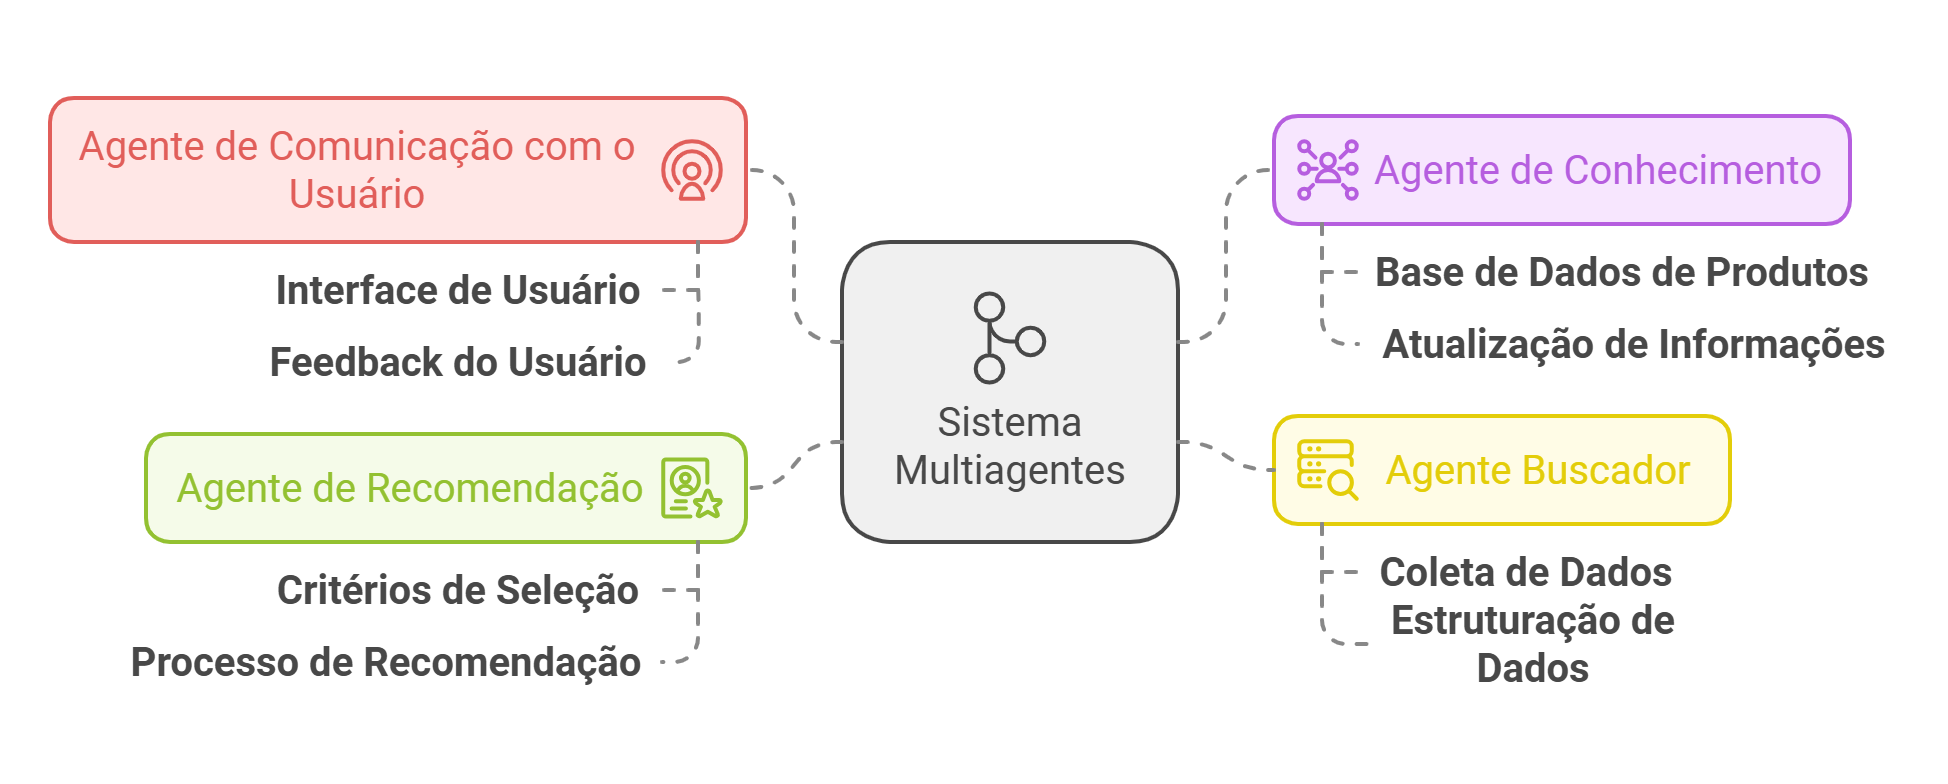

## Instalando Bibliotecas

In [ ]:
!pip install crewai crewai_tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.0/192.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.0/468.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.4/211.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

## Importações

In [ ]:
from crewai import Agent, Task, Crew
from crewai_tools import SerperDevTool, ScrapeWebsiteTool, YoutubeVideoSearchTool
from google.colab import userdata
import os

## Carregando secrets e variáveis de ambiente

In [ ]:
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_MODEL_NAME"] = 'gpt-4o-mini-2024-07-18'
model = os.environ["OPENAI_MODEL_NAME"]
os.environ["SERPER_API_KEY"] = userdata.get('SERPER_API_KEY')

## Definindo Agentes


In [ ]:
search_tool = SerperDevTool()
scraper_tool = ScrapeWebsiteTool()
youte_decoder_tool = YoutubeVideoSearchTool()

In [ ]:
comunicador = Agent(
    role="Especialista em Comunicação com o Usuário",
    goal="Entender as necessidades e preferências do usuário em relação ao {produto} que deseja comprar.",
    backstory=(
        "Você é um especialista amigável e intuitivo em comunicação. "
        "Sua função é fazer perguntas claras e coletar informações precisas do usuário sobre o {produto} desejado."
    ),
    llm=model,
    memory=True,
    verbose=True,
    max_iter=1,
    respect_context_window=True
)

In [ ]:
buscador = Agent(
    role="Especialista em Busca de Produtos",
    goal="Encontrar sites confiáveis que ofereçam {produto} compatíveis com as preferências do usuário.",
    backstory=(
        "Você é um pesquisador eficiente e detalhista, capaz de localizar opções de {produto} com precisão e rapidez."
        "Seu trabalho é garantir que os resultados da busca sejam relevantes e confiáveis."
        "Ao receber o input do porduto final gerado pelo Agente Recomendador, faça uma pesquisa a fundo por sites confiáveis que façam venda deste produto, sempre buscando a melhor relação de custo, benefícios e confiabilidade dos sites de venda."
        "Busque pelos problemas mais comuns reportados pelos usuários"
    ),
    llm=model,
    tools=[SerperDevTool(), ScrapeWebsiteTool(), youte_decoder_tool],
    memory=False,
    verbose=True,
    max_iter=3,
    respect_context_window=True,
)

In [ ]:
conhecimento = Agent(
    role="Especialista em Conhecimento de Produtos",
    goal="Analisar informações sobre {produto} e gerar uma visão geral de características principais, pontos de atenção e prós e contras.",
    backstory=(
        "Você é um especialista em {produto} com ampla experiência em analisar dados e fornecer informações relevantes. "
        "Sua missão é sintetizar conhecimento e orientar o usuário na escolha do melhor {produto}."
    ),
    llm=model,
    memory=True,
    verbose=True,
    allow_delegation=True,
    max_iter=1,
    respect_context_window=True,

)

In [ ]:
recomendador = Agent(
    role="Consultor de Recomendação de Produtos",
    goal="Analisar os dados coletados e recomendar a melhor opção de {produto} com base no equilíbrio entre prós e contras.",
    backstory=(
        "Você é um consultor analítico especializado em avaliar opções de {produto} e recomendar aquela que oferece o melhor valor "
        "para as necessidades específicas do usuário."
        "Ao encontrar os melhores sites, crie uma lista com os 10 melhores, indicando o link, nivel de confiabilidade de 1 a 5 (com base em reviews do site Reclame Aqui, quando existirem), ordene a lista em relação custo/confiabilidade."
    ),
    llm=model,
    memory=True,
    verbose=True,
    max_iter=1,
    respect_context_window=True,
)

## Definição das tarefas

In [ ]:
comunicar = Task(
    description="""
        Pergunte ao usuário qual {produto} ele deseja comprar e colete detalhes como tipo, faixa de preço,
        funcionalidades desejadas e preferências específicas.
    """,
    expected_output="""
        Um conjunto de informações estruturadas sobre o {produto} desejado pelo usuário, incluindo critérios de busca.
    """,
    agent=comunicador,
    async_execution=False
)

In [ ]:
buscar = Task(
    description="""
        Use as informações fornecidas pelo Especialista em Comunicação com o Usuário para encontrar {produto} similares disponíveis na internet.
        Busque em fontes confiáveis e obtenha links e descrições básicas.
    """,
    expected_output="""
        Uma lista de {produto} encontrados, incluindo nome, descrição resumida, preço e links para compra.
        Certifique-se de buscar informações em português brasil e com preços em reais.
    """,
    agent=buscador,
    tools=[SerperDevTool(), ScrapeWebsiteTool()],
    context=[comunicar],
    async_execution=True
)

In [ ]:
conhecer = Task(
    description="""
        Analise as informações coletadas pelo Especialista em Comunicação com o Usuário. Com base nos dados, gere uma visão geral das
        características principais do {produto}, incluindo pontos positivos e negativos e fatores de atenção para a compra.
    """,
    expected_output="""
        Um relatório estruturado com os principais prós e contras do {produto} e orientações para a compra.
    """,
    agent=conhecimento,
    tools=[SerperDevTool(), ScrapeWebsiteTool()],
    context=[comunicar,buscar],
)

In [ ]:
entender = Task(
    agent=conhecimento,
    description="""
        Analise das informações gerais coletados pelo Especialista de Buscador a respeito do {produto}.
        Compara o que tem de informação na internet com a base de conhecimento gerada pelo modelo de LLM,
        gerando um relatório final sobre o que o {produto} buscado deve ter.
    """,
    expected_output='Cria a definição ideal do {produto}, baseado nas informações coletadas na internet e nos conhecimentos gerados pelo próprio modelo.',
    context=[comunicar,buscar,conhecer],
)

In [ ]:
validar = Task(
    description="""
               "Encontrar os melhores sites, criar uma lista com os 10 melhores, indicando o link, nivel de confiabilidade de 1 a 5, ordene a lista em relação custo/confiabilidade."
    """,
    expected_output="""
        Uma recomendação detalhada do {produto} mais adequado para o usuário incluindo justificativa, baseado na análise de reviews.
    """,
    agent=conhecimento,
    context=[buscar, entender],
    tools=[SerperDevTool(), ScrapeWebsiteTool()],
)

In [ ]:
recomendar = Task(
    description="""
        Com base nas informações do Especialista de Conhecimento de Produtos e na lista de {produto} buscados, identifique o {produto}
        que oferece a melhor relação entre pontos positivos e negativos e se alinha às preferências do usuário.
    """,
    expected_output="""
        Uma recomendação detalhada do {produto} mais adequado para o usuário, incluindo justificativa e link para compra.
    """,
    agent=recomendador,
    context=[buscar, entender, validar],
    async_execution=False,
)

## Criando uma equipe de agentes

In [ ]:
equipe = Crew(
    agents=[comunicador,conhecimento, buscador, recomendador],
    tasks=[
        comunicar,
        buscar,
        conhecer,
        entender,
        validar,
        recomendar
    ],
    verbose=True,
    planning=True
)


## Executando a equipe

In [ ]:
produto='melhores headphones para home studio com cabo e com foco em mixagem e masterização'
inputs = {'produto': produto}
resultado = equipe.kickoff(inputs=inputs)

 
[2024-12-20 22:41:44][INFO]: Planning the crew execution
# Agent: Especialista em Comunicação com o Usuário
## Task: 
        Pergunte ao usuário qual melhores headphones para home studio com cabo e com foco em mixagem e masterização ele deseja comprar e colete detalhes como tipo, faixa de preço,
        funcionalidades desejadas e preferências específicas.
    O Especialista em Comunicação com o Usuário deve iniciar uma conversa amigável e intuitiva com o usuário. Ele deverá fazer perguntas abertas e diretas, como: 'Qual tipo de headphones você está procurando?' e 'Qual faixa de preço você considera ideal?'. Além disso, deve coletar informações sobre funcionalidades específicas, como cancelamento de ruído ou conforto para longas sessões de uso. A coleta de todas estas informações deve ser organizada, talvez em uma tabela ou formato similar, para facilitar a análise posterior.


# Agent: Especialista em Comunicação com o Usuário
## Final Answer: 
Olá! Estou aqui para ajudar você a en

## Resultado Final

In [ ]:
# Acessar a saída da última task
print(f"Recomendação Final: {recomendar.output.raw}")